# Utilizando o Gapminder


## Instalação

Primeiro, é preciso instalar o pacote do Gapminder:

In [1]:
if (!require("gapminder")) {
    install.packages("gapminder")
    suppressMessages(library("gapminder"))
}

Loading required package: gapminder



Testando se foi importado corretamente:

In [2]:
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


## Visualizando os dados com a sintaxe do _tidyverse_

Comandos disponíveis em https://cran.r-project.org/web/packages/gapminder/README.html.

In [3]:
aggregate(lifeExp ~ continent, gapminder, median)

continent,lifeExp
<fct>,<dbl>
Africa,47.7920
Americas,67.0480
Asia,61.7915
Europe,72.2410
Oceania,73.6650


Visualizando em formato de tabela:

In [4]:
suppressMessages(library("dplyr"))

gapminder %>% filter(year == 2007) %>% group_by(continent) %>% summarise(lifeExp = median(lifeExp))

,continent,lifeExp
,<fct>,<dbl>
1,Africa,52.9265
2,Americas,72.8990
3,Asia,72.3960
4,Europe,78.6085
5,Oceania,80.7195


Visualizando em formato de gráfico:

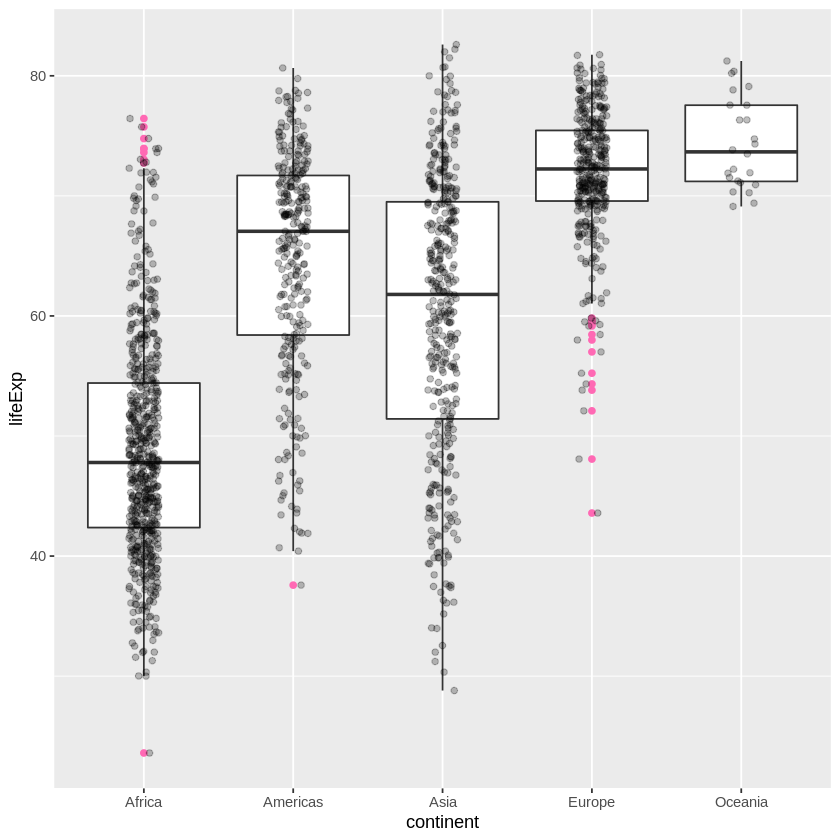

In [5]:
suppressMessages(library("ggplot2"))

grafico <- ggplot(gapminder, aes(x = continent, y = lifeExp)) + geom_boxplot(outlier.colour = "hotpink") + 
    geom_jitter(position = position_jitter(width = 0.1, height = 0), alpha = 1/4)

grafico

Salvando o gráfico construído em PNG (acesse [aqui](/view/conteudos/gapminder/grafico.png)):

In [6]:
ggsave(grafico, filename = "grafico.png", device = "png")

Saving 6.67 x 6.67 in image



Criando um gráfico customizável

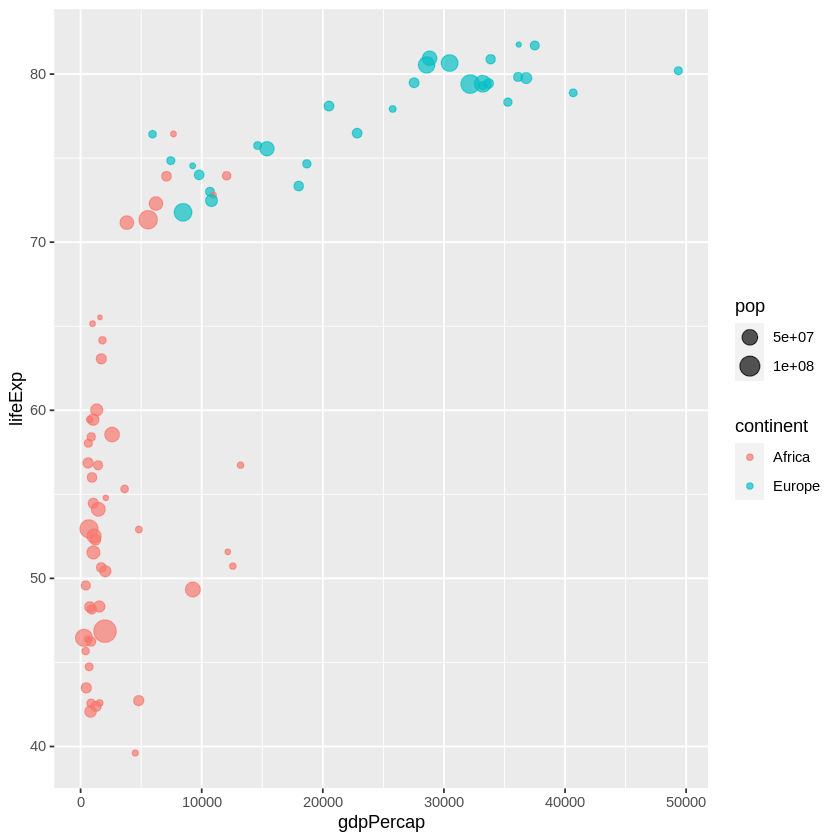

In [7]:
gapminer_filtrado <- gapminder %>% filter(year == 2007) %>% filter(continent == "Europe" | 
    continent == "Africa")

ggplot(gapminer_filtrado, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) + 
    geom_point(alpha = 2/3)